## Questão 1

In [13]:
type(frame_list)

list

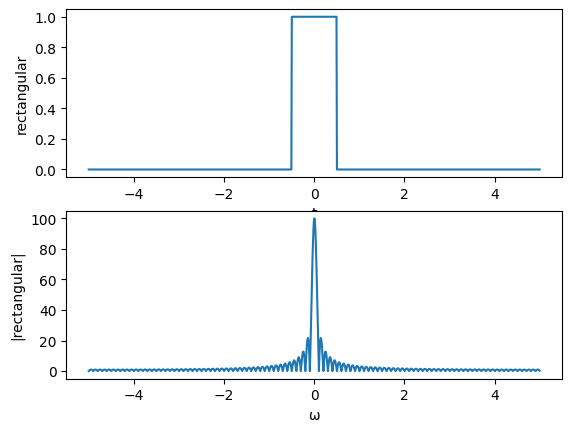

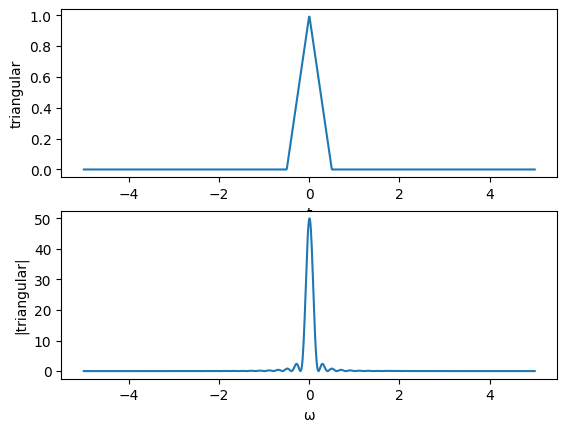

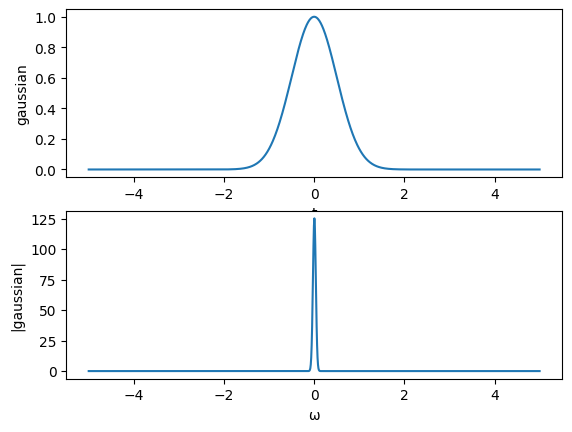

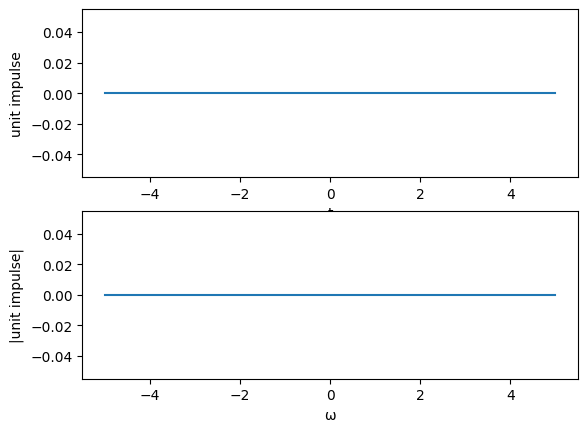

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

t=np.linspace(-10,10,1000)

def plot_signal_and_spectrum(signal, signal_name):
    # Calcula a transformada de Fourier da sinal
    spectrum = fftshift(fft(signal))

    # Define o eixo temporal e a frequência angular
    t = np.linspace(-5, 5, len(signal))
    w = np.linspace(-5, 5, len(spectrum))

    # Plota o sinal e a espectro de frequência
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.xlabel('t')
    plt.ylabel(signal_name)

    plt.subplot(2, 1, 2)
    plt.plot(w, abs(spectrum))
    plt.xlabel('ω')
    plt.ylabel('|' + signal_name + '|')
    plt.show()

def rectangular_signal(t):
    return np.where((t > -1) & (t < 1), 1, 0)

def triangular_signal(t):
    t = np.abs(t)
    return np.where(t < 1, 1-t, 0)

def gaussian_signal(t):
    return np.exp(-t**2 / 2)

def unit_impulse(t):
    return np.where(np.isclose(t, 0), 1, 0)

# Plota o sinal retangular e sua transformada de Fourier
plot_signal_and_spectrum(rectangular_signal(t), 'rectangular')

# Plota o sinal triangular e sua transformada de Fourier
plot_signal_and_spectrum(triangular_signal(t), 'triangular')

# Plota o sinal gaussiano e sua transformada de Fourier
plot_signal_and_spectrum(gaussian_signal(t), 'gaussian')

# Plota o impulso unitário e sua transformada de Fourier
plot_signal_and_spectrum(unit_impulse(t), 'unit impulse')

## Questão 2

[ WARN:0@918.244] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


MEDIA RGB E POR CANAL


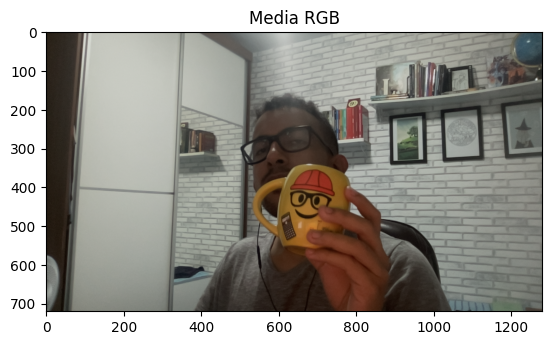

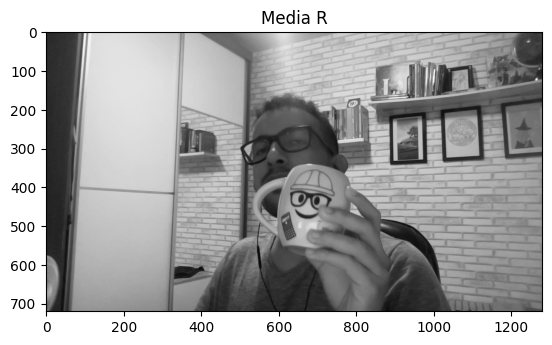

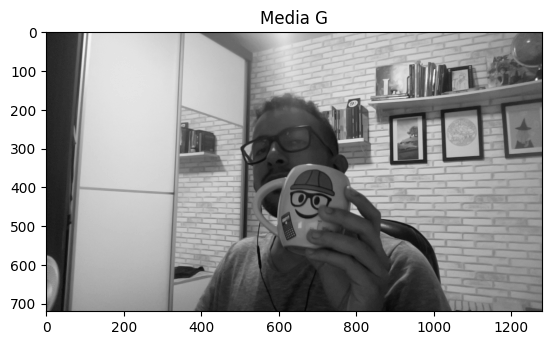

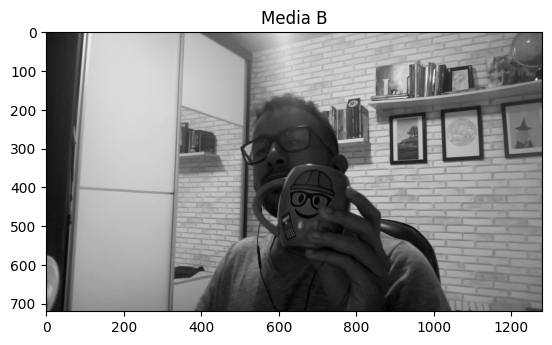

DESVIO PADRÃO RGB E POR CANAL


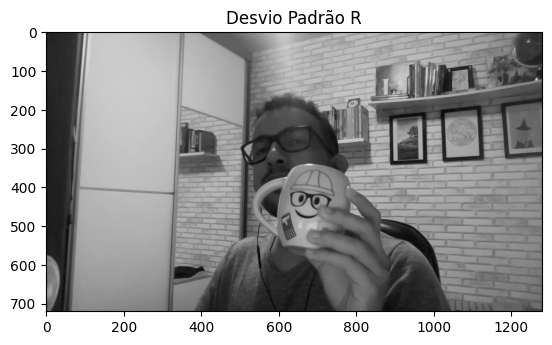

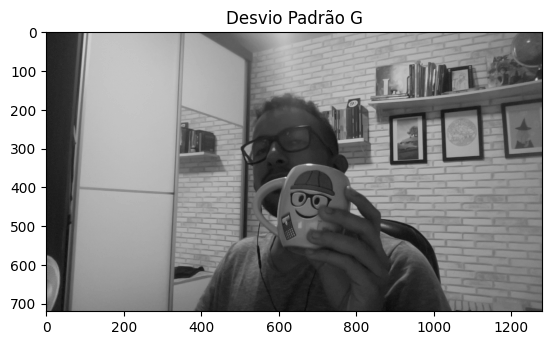

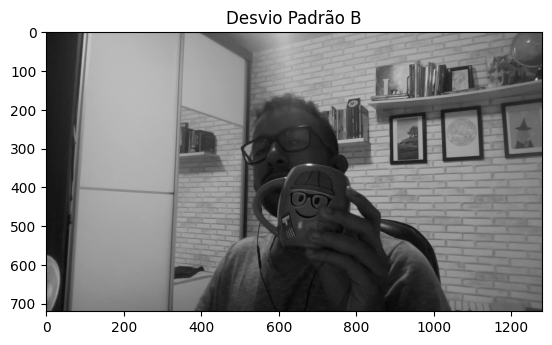

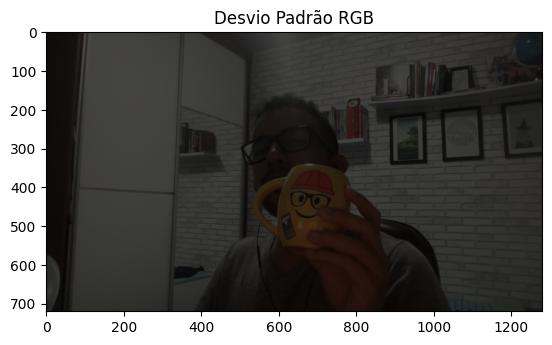

VARIANCIA RGB E POR CANAL


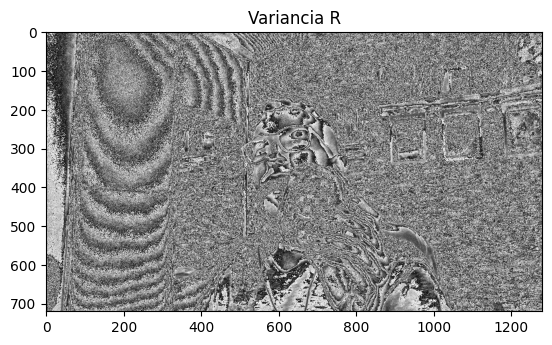

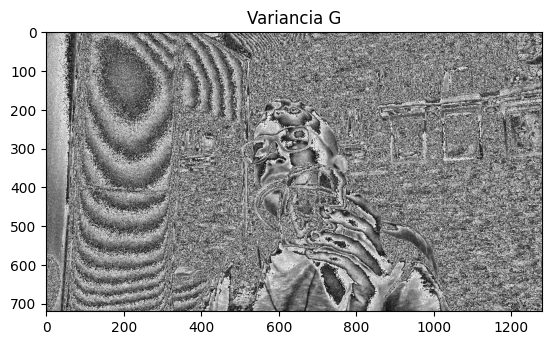

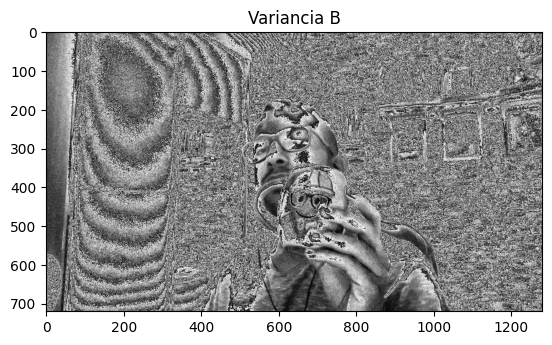

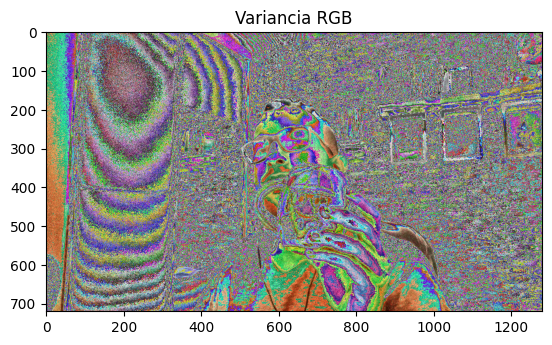

In [8]:
import cv2
import numpy as np

#capture 20 frames from camera
cap = cv2.VideoCapture(0)
frame_list = []
for i in range(20):
    ret, frame = cap.read()
    frame_list.append(frame)
cap.release()
cv2.destroyAllWindows()

#calculate mean of the 20 frames
img = frame_list[0]
img = img.astype(float)
for i in range(1,20):
    img2 = frame_list[i]
    img2 = img2.astype(float)
    img = img + img2
mean_image = img/20
mean_image = mean_image.astype(np.uint8)

#calculate variance of the 20 frames
img = frame_list[0]
img = img.astype(float)
for i in range(1,20):
    img2 = frame_list[i]
    img2 = img2.astype(float)
    img = img + (img2 - mean_image)**2
variance_image = img/20
variance_image = variance_image.astype(np.uint8)

#calculate standard deviation of the 20 frames
img = frame_list[0]
img = img.astype(float)
for i in range(1,20):
    img2 = frame_list[i]
    img2 = img2.astype(float)
    img = img + (img2 - mean_image)**2
standard_deviation_image = img/20
standard_deviation_image = np.sqrt(standard_deviation_image)
standard_deviation_image = standard_deviation_image.astype(np.uint8)

print("MEDIA RGB E POR CANAL")

#plot image 
import matplotlib.pyplot as plt
img = mean_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Media RGB")
plt.show()  

#plot separe image separate channels MEAN
img = mean_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,0], cmap='gray')
plt.title("Media R")
plt.show()
plt.imshow(img[:,:,1], cmap='gray')
plt.title("Media G")
plt.show()
plt.imshow(img[:,:,2], cmap='gray')
plt.title("Media B")
plt.show()

print("DESVIO PADRÃO RGB E POR CANAL")

#plot separe image separate channels STANDARD DEVIATION

img = standard_deviation_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,0], cmap='gray')
plt.title("Desvio Padrão R")
plt.show()
plt.imshow(img[:,:,1], cmap='gray')
plt.title("Desvio Padrão G")
plt.show()
plt.imshow(img[:,:,2], cmap='gray')
plt.title("Desvio Padrão B")
plt.show()

#plot image 
import matplotlib.pyplot as plt
img = standard_deviation_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Desvio Padrão RGB")
plt.show()  

print("VARIANCIA RGB E POR CANAL")

#plot separe image separate channels VARIANCE

img = variance_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,0], cmap='gray')
plt.title("Variancia R")
plt.show()
plt.imshow(img[:,:,1], cmap='gray')
plt.title("Variancia G")
plt.show()
plt.imshow(img[:,:,2], cmap='gray')
plt.title("Variancia B")
plt.show()

#plot image 
import matplotlib.pyplot as plt
img = variance_image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Variancia RGB")
plt.show()  


### Letra b

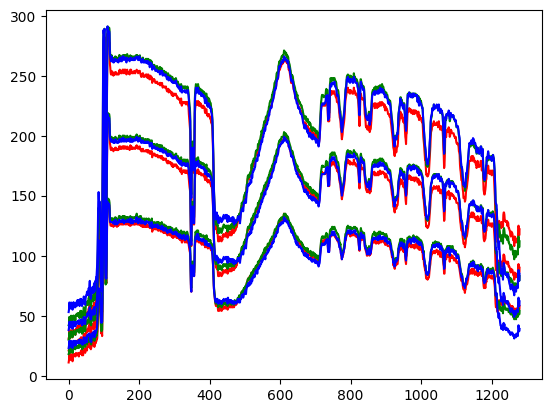

In [9]:
#plot line 13 mean + standard deviation
img = mean_image
img2 = standard_deviation_image
img = img.astype(float)
img2 = img2.astype(float)
mean_plus_std = (img + img2)[13,:,0]
mean_minus_std = (img - img2)[13,:,0]
plt.plot(mean_plus_std, 'r', mean_minus_std, 'r', img[13,:,0], 'r')
mean_plus_std = (img + img2)[13,:,1]
mean_minus_std = (img - img2)[13,:,1]
plt.plot(mean_plus_std, 'g', mean_minus_std, 'g', img[13,:,1], 'g')
mean_plus_std = (img + img2)[13,:,2]
mean_minus_std = (img - img2)[13,:,2]
plt.plot(mean_plus_std, 'b', mean_minus_std, 'b', img[13,:,2], 'b')

## Letra c

In [18]:
# Seleciona 5 imagens aleatórias da lista de frames
import random
random_frames = random.sample(frame_list, 5)

# Cria uma lista para armazenar os valores mínimos e máximos de cada cor
min_max_values = []

# Percorre a lista de frames aleatórios
for frame in random_frames:
  # Lê a imagem
  img = frame

  # Converte a imagem para níveis de cinza
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Calcula o valor mínimo e máximo de cada cor
  min_value, max_value, _, _ = cv2.minMaxLoc(gray_img)

  # Adiciona os valores mínimo e máximo à lista
  min_max_values.append((min_value, max_value))

# Imprime os valores mínimo e máximo para cada cor
for values in min_max_values:
  print(f"Valor mínimo: {values[0]}, Valor máximo: {values[1]}")


Valor mínimo: 0.0, Valor máximo: 255.0
Valor mínimo: 0.0, Valor máximo: 255.0
Valor mínimo: 0.0, Valor máximo: 255.0
Valor mínimo: 0.0, Valor máximo: 255.0
Valor mínimo: 0.0, Valor máximo: 67.0


## Questao 3

In [23]:
import cv2
import numpy as np

#capture 25 frames from camera
cap = cv2.VideoCapture(0)
frame_list = []
for i in range(25):
    ret, frame = cap.read()
    frame_list.append(frame)
cap.release()
cv2.destroyAllWindows()


[ WARN:0@8207.181] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


In [24]:
from statistics import covariance
import cv2
import numpy as np

def calculate_covariance(frame_list):
    covariances = []
    for img in frame_list:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img[256-16:256+16, 256-16:256+16]
        img = img.astype(float)
        covarience = np.zeros((3,3))
        for i in range(3):
            for j in range(3):
                covarience[i,j] = np.mean((img[:,:,i] - np.mean(img[:,:,i])) * (img[:,:,j] - np.mean(img[:,:,j])))
        covariances.append(covarience)
    return covariances

covariances = calculate_covariance(frame_list)



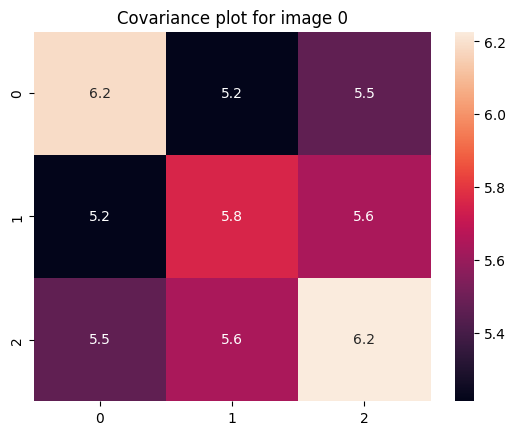

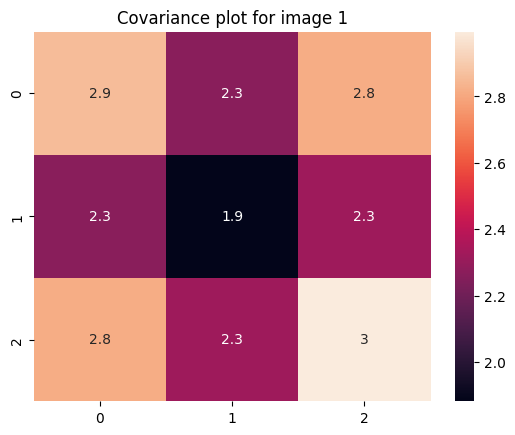

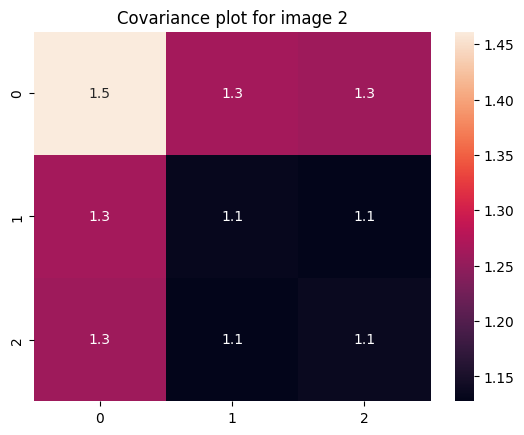

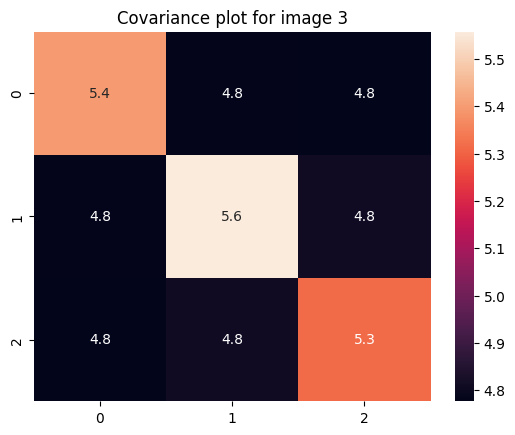

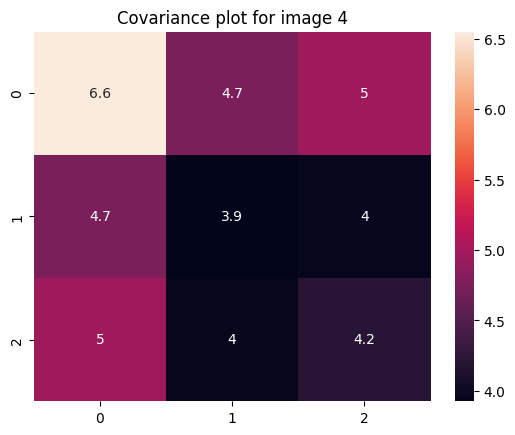

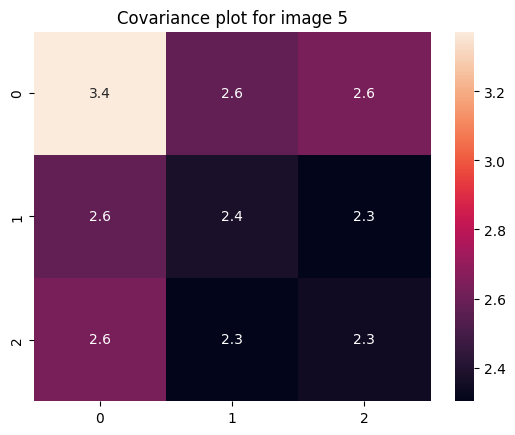

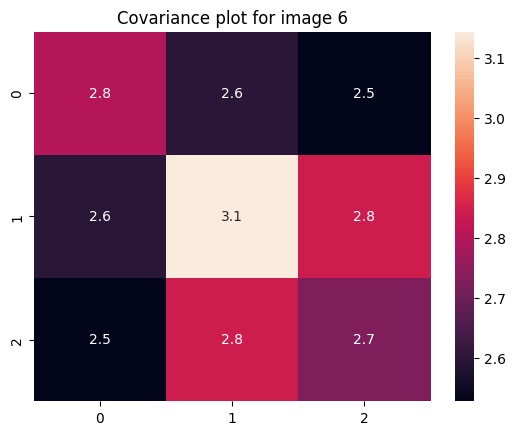

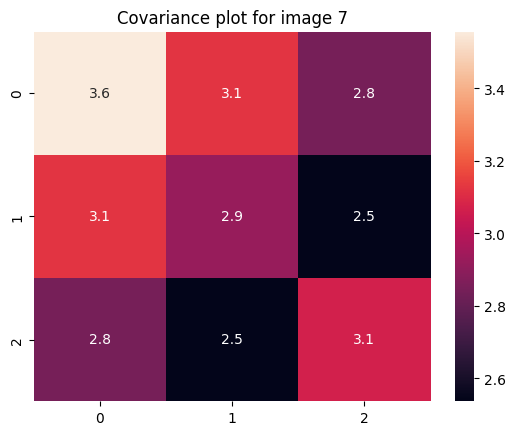

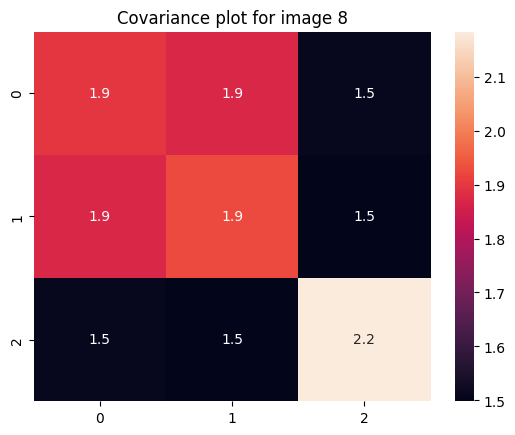

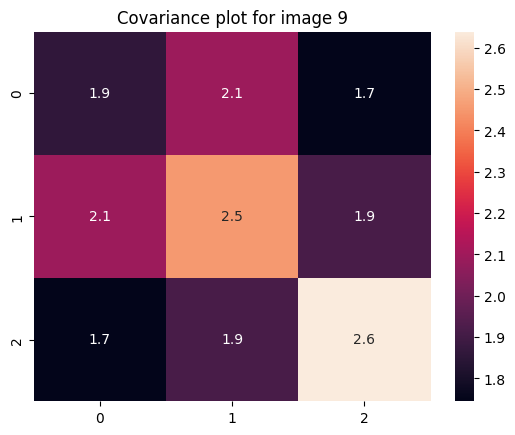

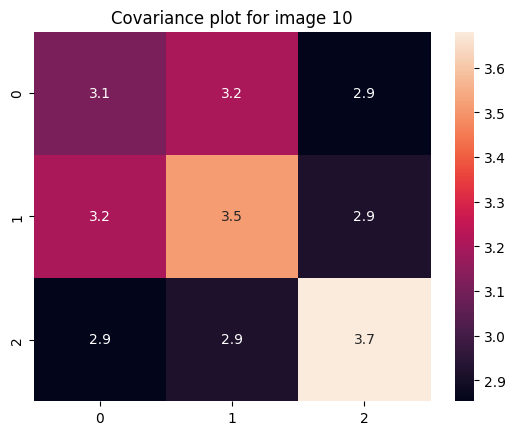

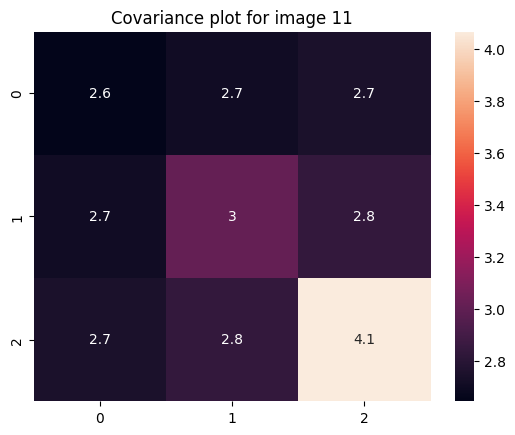

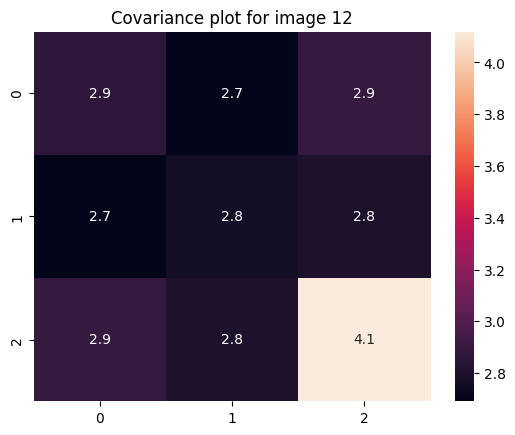

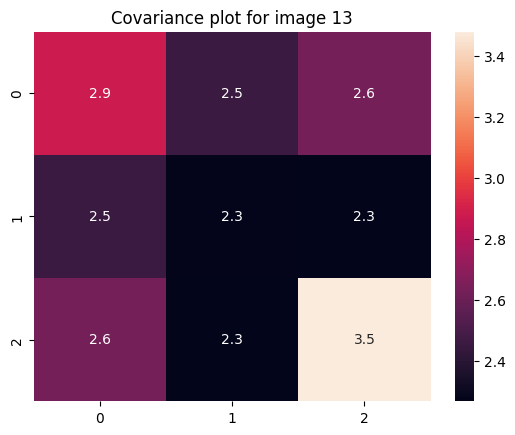

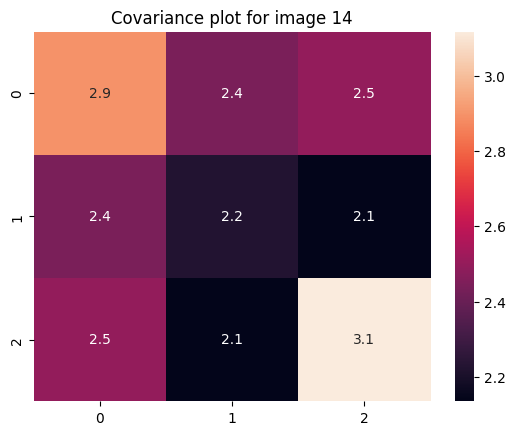

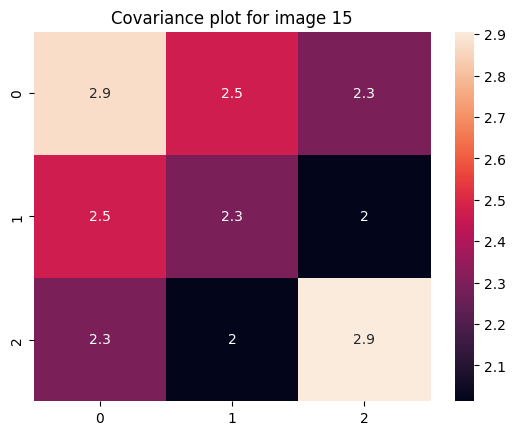

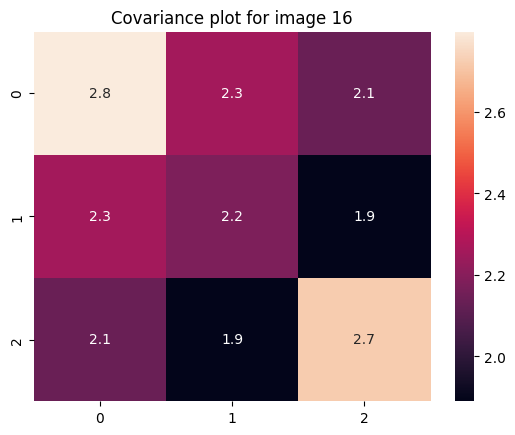

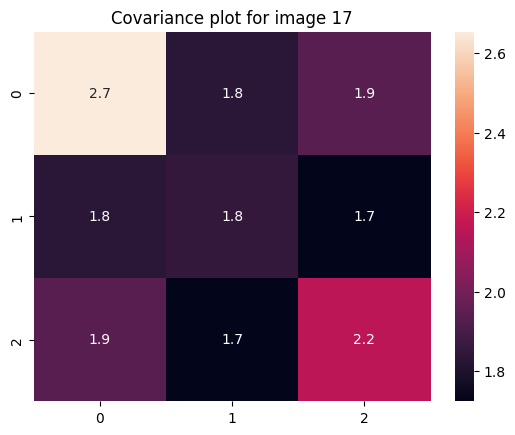

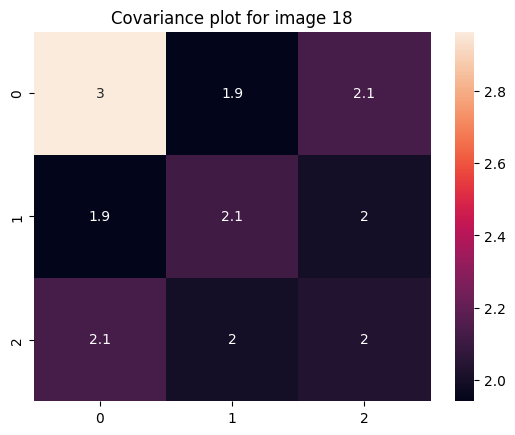

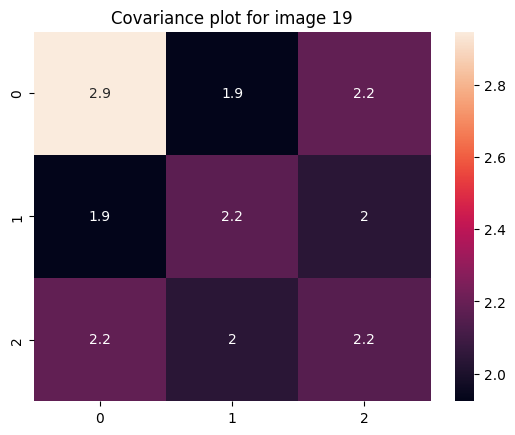

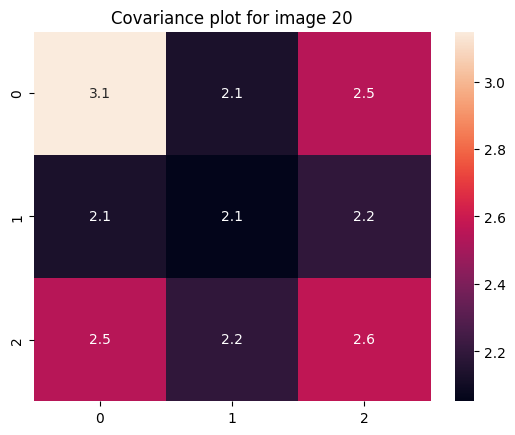

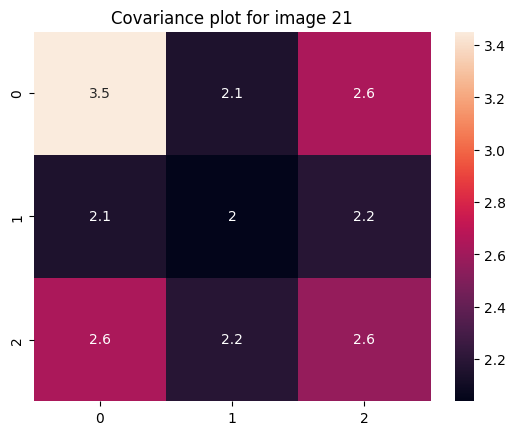

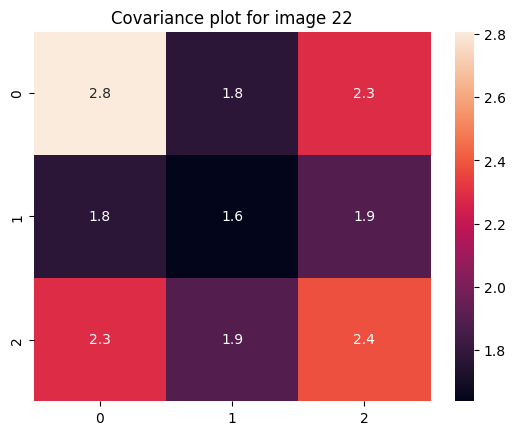

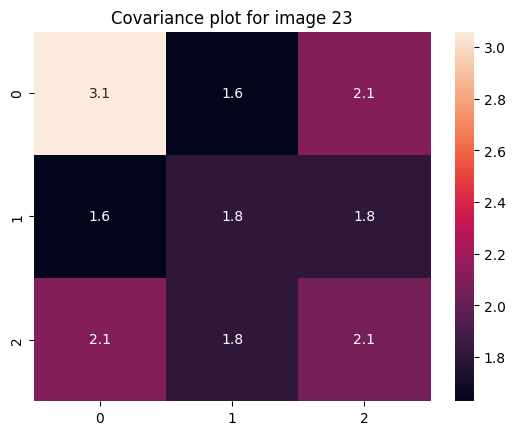

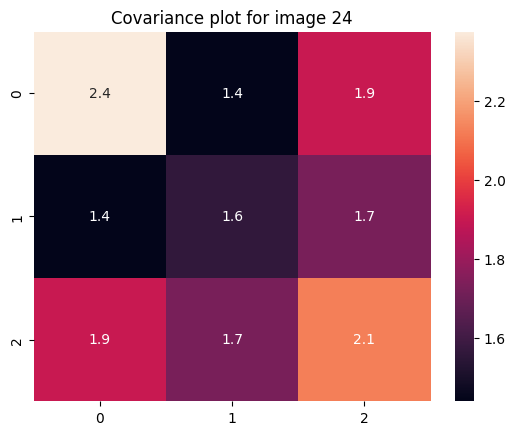

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_covariance(covariances):
    for i, cov in enumerate(covariances):
        plt.figure()
        sns.heatmap(cov, annot=True)
        plt.title("Covariance plot for image {}".format(i))
        plt.show()

plot_covariance(covariances)


## Questão 4

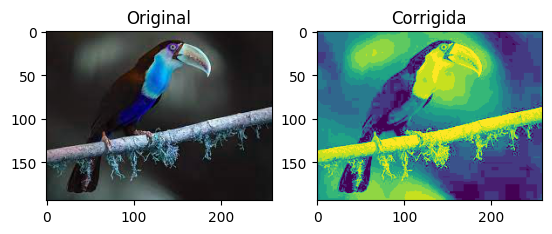

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem original
img = cv2.imread('imagem.jpg')

# Converte para tons de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcula o histograma da imagem
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Calcula a função de distribuição acumulada (CDF) a partir do histograma
cdf = hist.cumsum()

# Normaliza a CDF
cdf_normalized = cdf * hist.max() / cdf.max()

# Aplica a transformação à imagem
img_equalized = np.empty(gray.shape, dtype=np.uint8)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        img_equalized[i, j] = 255 * cdf_normalized[gray[i, j]] / cdf.max()

# Exibe as imagens original e corrigida usando o matplotlib
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(img_equalized)
plt.title('Corrigida')

plt.show()
